In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석/LDA.csv')

In [19]:
import warnings
import matplotlib.pyplot as plt
import matplotlib

# 모든 matplotlib 경고 무시
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트 캐시 초기화
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 추가적인 경고 메시지 비활성화
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


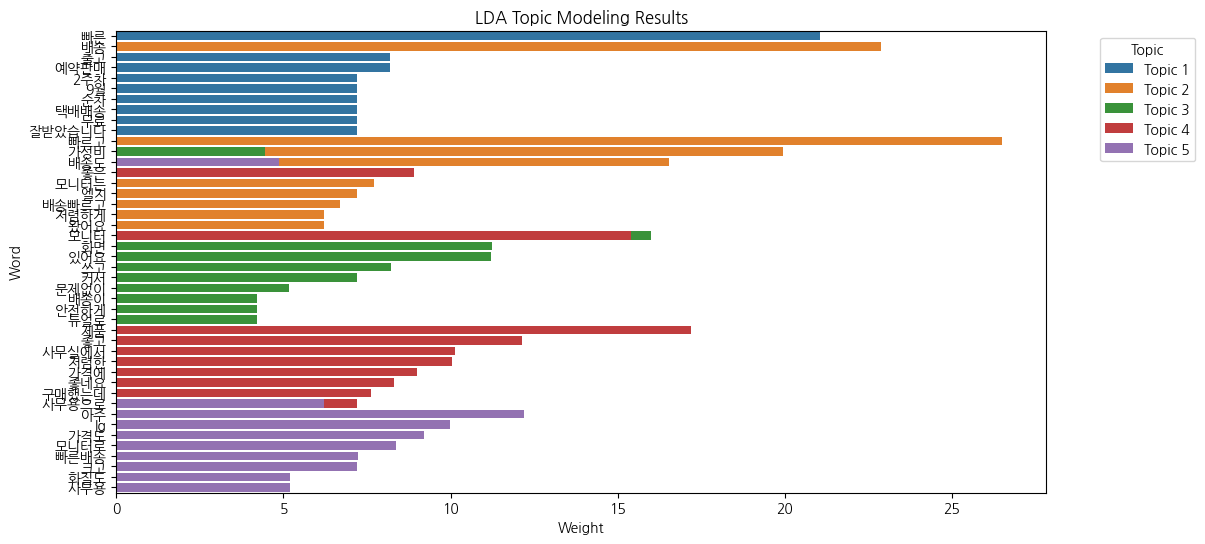

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 토픽별 상위 단어 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Weight", y="Word", hue="Topic", dodge=False)
plt.xlabel("Weight")
plt.ylabel("Word")
plt.title("LDA Topic Modeling Results")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

- 대부분의 토픽에서 배송 관련 키워드가 공통적으로 등장하며, 이는 배송 서비스가 중요한 평가 요소임을 시사
- 사무용 모니터로서의 활용도가 높게 나타남
- 가격 대비 성능(가성비)에 대한 긍정적인 평가가 많음
- LG 브랜드에 대한 신뢰도가 높게 나타남

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

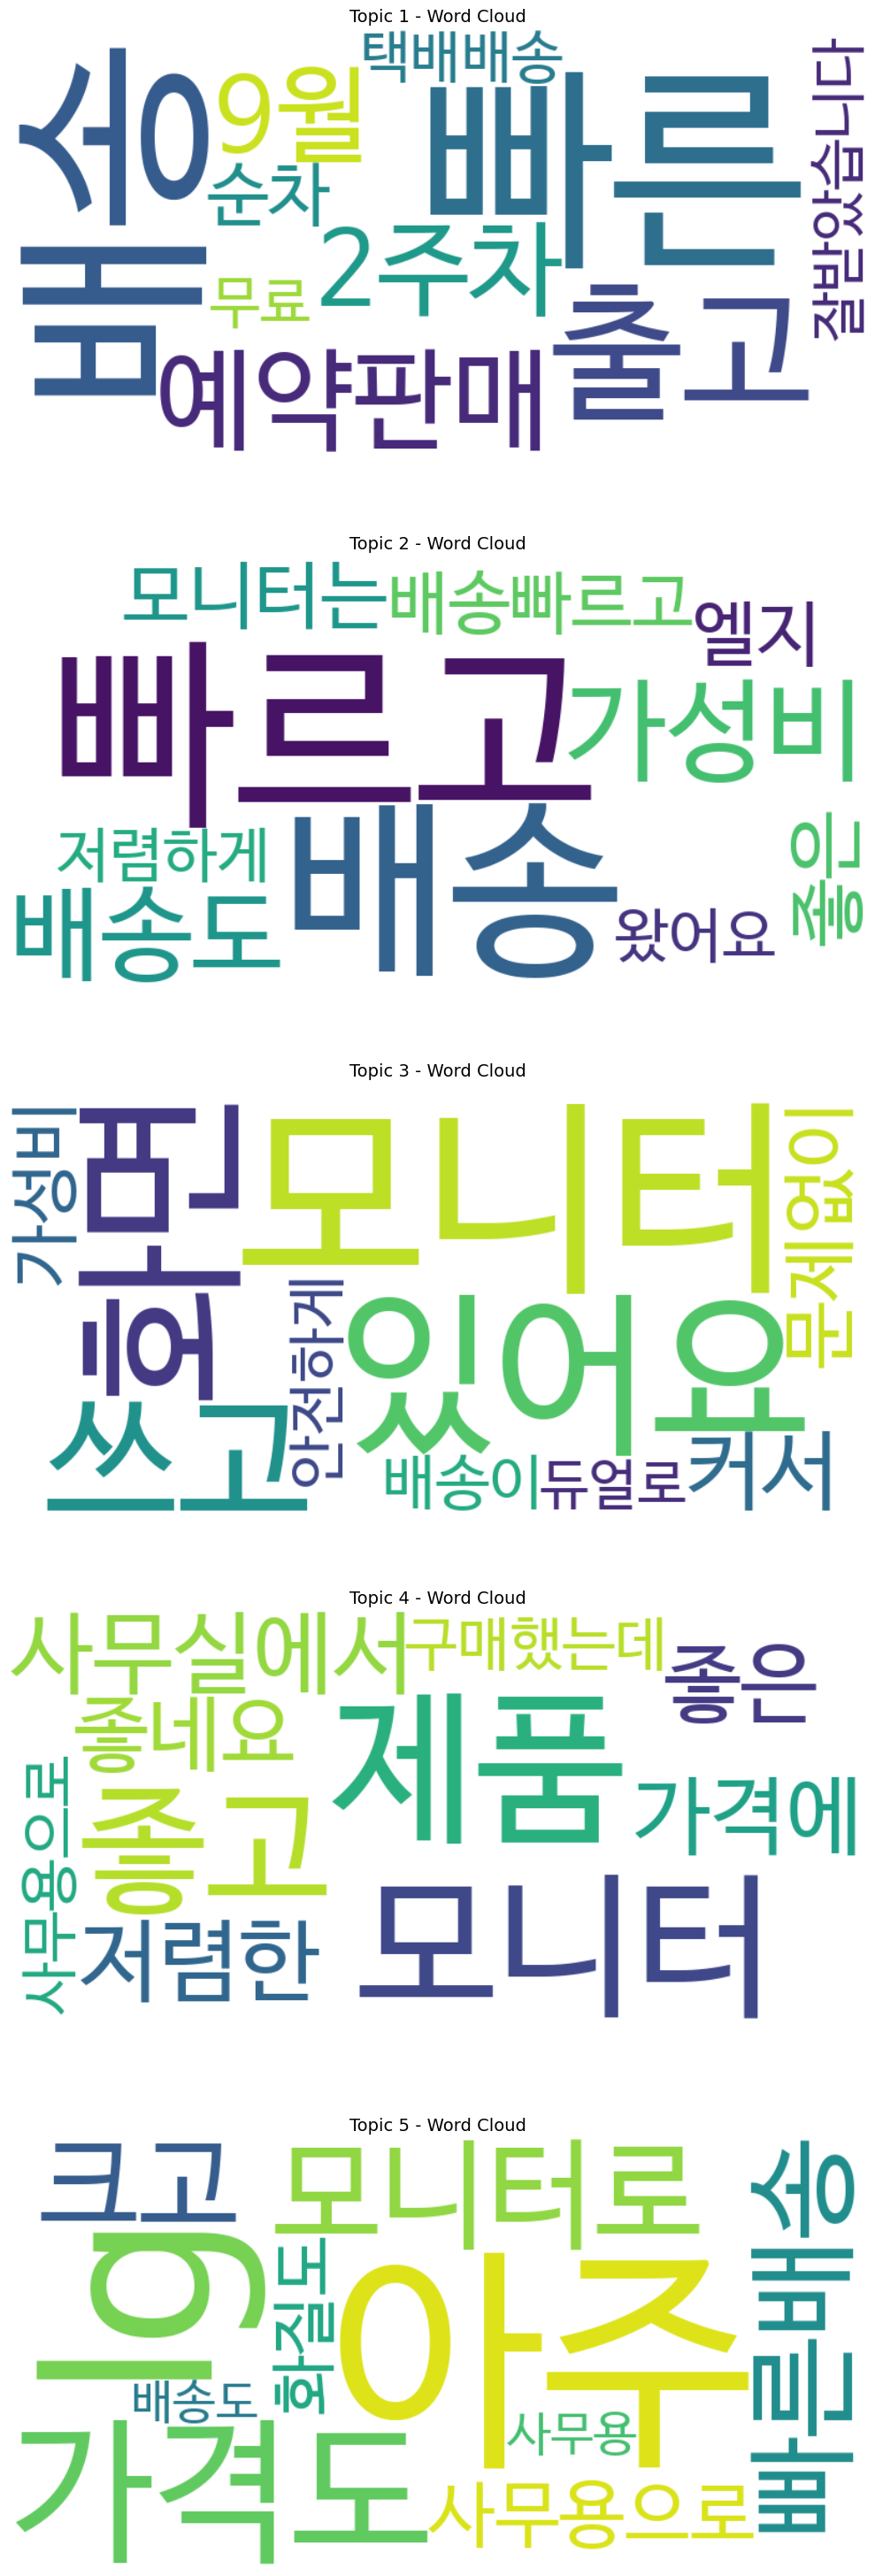

In [6]:
from wordcloud import WordCloud

# matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 토픽별 워드클라우드 생성
topics = df["Topic"].unique()
fig, axes = plt.subplots(len(topics), 1, figsize=(10, 6 * len(topics)))

for i, topic in enumerate(topics):
    topic_df = df[df["Topic"] == topic]
    word_freq = dict(zip(topic_df["Word"], topic_df["Weight"]))

    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 폰트 경로 지정
        width=800,
        height=400,
        background_color="white"
    ).generate_from_frequencies(word_freq)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"{topic} - Word Cloud", fontsize=14)

plt.tight_layout()
plt.show()

- 배송 속도와 가격 대비 만족도에 대한 평가가 주를 이룸

- 실제 사용 후기와 경험담

- 특히 사무용으로서의 적합성 평가가 많이 포함

### 날짜별 리뷰 개수 분석

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석/data_processed.csv')

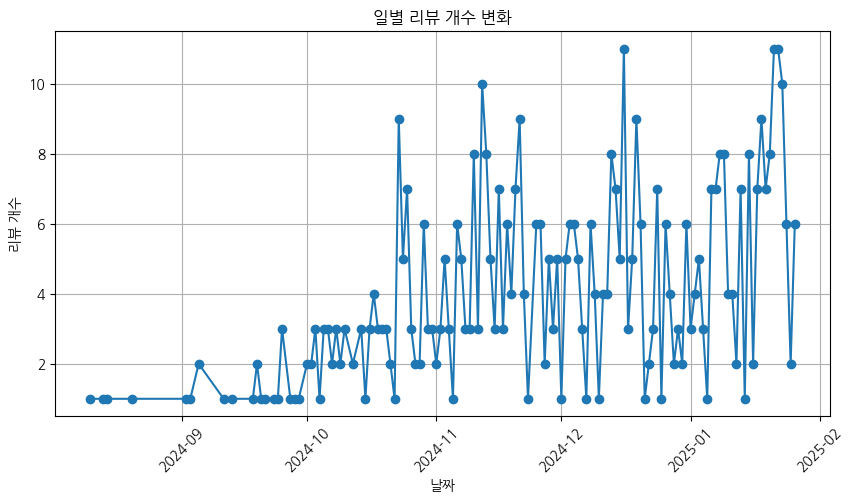

In [20]:
import matplotlib.pyplot as plt

# 날짜 데이터 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# 일별 리뷰 개수 집계
daily_reviews = df["날짜"].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(daily_reviews.index, daily_reviews.values, marker='o', linestyle='-')
plt.xlabel("날짜")
plt.ylabel("리뷰 개수")
plt.title("일별 리뷰 개수 변화")
plt.xticks(rotation=45)
plt.grid()

# 그래프 표시
plt.show()

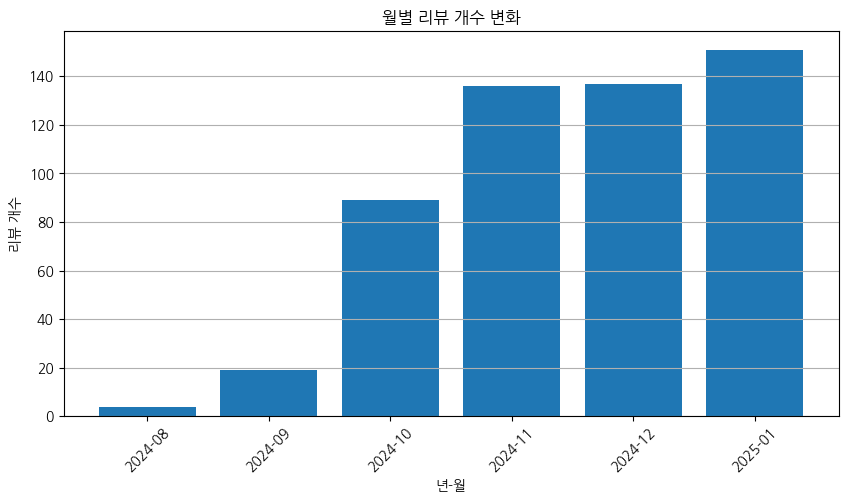

In [21]:
# 월별 리뷰 개수 집계
df["년월"] = df["날짜"].dt.to_period("M")
monthly_reviews = df["년월"].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(monthly_reviews.index.astype(str), monthly_reviews.values)
plt.xlabel("년-월")
plt.ylabel("리뷰 개수")
plt.title("월별 리뷰 개수 변화")
plt.xticks(rotation=45)
plt.grid(axis="y")

# 그래프 표시
plt.show()

- 리뷰의 수는 꾸준히 증가하는 것으로 보아, 판매량이 꾸준히 증가한다고 추정할수있다.

- 특히 24년 10월에 리뷰 글 개수가 크게 증가하였다.